In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/pre-cog/keys/cases_court_key.csv
/kaggle/input/pre-cog/keys/judge_case_merge_key.csv
/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/ka

In [2]:
case = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2014.csv')
print(case.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201908000022014  2014           1          1         1   
1  01-01-01-201908000032014  2014           1          1         1   
2  01-01-01-201908000052014  2014           1          1         1   
3  01-01-01-201908000062014  2014           1          1         1   
4  01-01-01-201908000072014  2014           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000982014  chief judicial magistrate    -9998 unclear   
1  MHNB030001052014  chief judicial magistrate           0 male   
2  MHNB030001302014  chief judicial magistrate           0 male   
3  MHNB030000512014  chief judicial magistrate           0 male   
4  MHNB030000522014  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999           -9998     1907.0        5487.0   
1          1 fem

In [3]:
acts_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')

mer_1 = case.merge(acts_sec, left_on = "ddl_case_id", right_on = "ddl_case_id", how = "left")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(mer_1.iloc[900403:900440,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
900403  01-30-13-202718000302014  2014           1         30        13   
900404  01-30-13-202718000312014  2014           1         30        13   
900405  01-30-13-202718000322014  2014           1         30        13   
900406  01-30-13-202718000332014  2014           1         30        13   
900407  01-30-13-202718000342014  2014           1         30        13   
900408  01-30-13-202718000352014  2014           1         30        13   
900409  01-30-13-202718000362014  2014           1         30        13   
900410  01-30-13-202718000372014  2014           1         30        13   
900411  01-30-13-202718000382014  2014           1         30        13   
900412  01-30-13-202718000392014  2014           1         30        13   
900413  01-30-13-202718000402014  2014           1         30        13   
900414  01-30-13-202718000412014  2014           1         30        13   
900415  01-30-13-20271800

In [5]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')

In [6]:
state_arr = state[state.columns[1:3]].values.tolist()
set(tuple(element) for element in state_arr)
state_x = [list(t) for t in set(tuple(element) for element in state_arr)]

In [7]:
print(state_x)

[[23, 'Madhya Pradesh'], [4, 'Kerala'], [6, 'Assam'], [5, 'Himachal Pradesh'], [24, 'Sikkim'], [25, 'Manipur'], [19, 'Mizoram'], [29, 'Telangana'], [20, 'Tripura'], [11, 'Orissa'], [33, 'Ladakh'], [30, 'Goa'], [26, 'Delhi'], [7, 'Jharkhand'], [18, 'Chhattisgarh'], [27, 'Chandigarh'], [8, 'Bihar'], [32, 'DNH at Silvasa'], [13, 'Uttar Pradesh'], [14, 'Haryana'], [9, 'Rajasthan'], [17, 'Gujarat'], [12, 'Jammu and Kashmir'], [3, 'Karnataka'], [22, 'Punjab'], [1, 'Maharashtra'], [15, 'Uttarakhand'], [31, 'Diu and Daman'], [21, 'Meghalaya'], [2, 'Andhra Pradesh'], [16, 'West Bengal'], [10, 'Tamil Nadu']]


In [8]:
states = pd.DataFrame(state_x, columns = ['state_code', 'state'])

In [9]:
print(states)

    state_code              state
0           23     Madhya Pradesh
1            4             Kerala
2            6              Assam
3            5   Himachal Pradesh
4           24             Sikkim
5           25            Manipur
6           19            Mizoram
7           29          Telangana
8           20            Tripura
9           11             Orissa
10          33             Ladakh
11          30                Goa
12          26              Delhi
13           7          Jharkhand
14          18       Chhattisgarh
15          27         Chandigarh
16           8              Bihar
17          32     DNH at Silvasa
18          13      Uttar Pradesh
19          14            Haryana
20           9          Rajasthan
21          17            Gujarat
22          12  Jammu and Kashmir
23           3          Karnataka
24          22             Punjab
25           1        Maharashtra
26          15        Uttarakhand
27          31      Diu and Daman
28          21

In [10]:
mer_2 = mer_1.merge(states, left_on = "state_code", right_on = "state_code", how = "left")

In [11]:
print(mer_2.iloc[899394:900001,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
899394  01-30-11-200610001172014  2014           1         30        11   
899395  01-30-11-200610001182014  2014           1         30        11   
899396  01-30-11-200610001192014  2014           1         30        11   
899397  01-30-11-200610001202014  2014           1         30        11   
899398  01-30-11-200610001212014  2014           1         30        11   
...                          ...   ...         ...        ...       ...   
899996  01-30-12-207309000332014  2014           1         30        12   
899997  01-30-12-207309000342014  2014           1         30        12   
899998  01-30-12-207309000352014  2014           1         30        12   
899999  01-30-12-207309000362014  2014           1         30        12   
900000  01-30-12-207309000372014  2014           1         30        12   

                    cino               judge_position female_defendant  \
899394  MHSO100002792014 

In [12]:
state_count = mer_2.groupby('state').count().reset_index()

In [13]:
print(state_count)

                state  ddl_case_id     year  state_code  dist_code  court_no  \
0      Andhra Pradesh       246828   246828      246828     246828    246828   
1               Assam       131610   131610      131610     131610    131610   
2               Bihar       355055   355055      355055     355055    355055   
3          Chandigarh        27899    27899       27899      27899     27899   
4        Chhattisgarh       131190   131190      131190     131190    131190   
5      DNH at Silvasa         1069     1069        1069       1069      1069   
6               Delhi       172409   172409      172409     172409    172409   
7       Diu and Daman          990      990         990        990       990   
8                 Goa        33592    33592       33592      33592     33592   
9             Gujarat       633923   633923      633923     633923    633923   
10            Haryana       396449   396449      396449     396449    396449   
11   Himachal Pradesh        88507    88

In [14]:
state_count.replace("Orissa", 
           "Odisha", 
           inplace=True)

state_count.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

state_count.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

state_count.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

state_count.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(state_count)

                     state  ddl_case_id     year  state_code  dist_code  \
0           Andhra Pradesh       246828   246828      246828     246828   
1                    Assam       131610   131610      131610     131610   
2                    Bihar       355055   355055      355055     355055   
3               Chandigarh        27899    27899       27899      27899   
4             Chhattisgarh       131190   131190      131190     131190   
5   Dadara & Nagar Havelli         1069     1069        1069       1069   
6             NCT of Delhi       172409   172409      172409     172409   
7              Daman & Diu          990      990         990        990   
8                      Goa        33592    33592       33592      33592   
9                  Gujarat       633923   633923      633923     633923   
10                 Haryana       396449   396449      396449     396449   
11        Himachal Pradesh        88507    88507       88507      88507   
12         Jammu & Kashmi

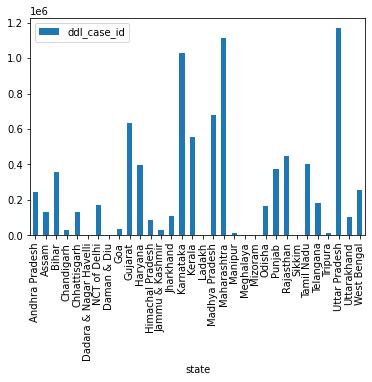

In [15]:
state_count.plot(x="state",y="ddl_case_id", kind="bar")
plt.pyplot.savefig('state_bar_2014.png')

In [16]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(state_count.set_index('state'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [17]:
 state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

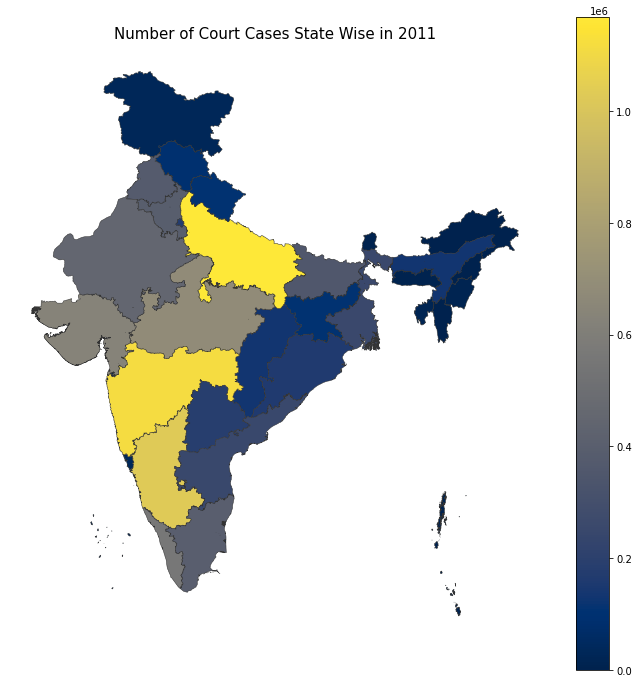

In [18]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Court Cases State Wise in 2011',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('state_map_2014.png')

In [19]:
state_2014 = state_map.iloc[:,[1]]
print(state_2014)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                        131610.0
Bihar                        355055.0
Chandigarh                    27899.0
Chhattisgarh                 131190.0
Dadara & Nagar Havelli         1069.0
Daman & Diu                     990.0
Goa                           33592.0
Gujarat                      633923.0
Haryana                      396449.0
Himachal Pradesh              88507.0
Jammu & Kashmir               29587.0
Jharkhand                    107528.0
Karnataka                   1029441.0
Kerala                       557128.0
Lakshadweep                       0.0
Madhya Pradesh               681486.0
Maharashtra                 1114737.0
Manipur                       13019.0
Meghalaya                      4890.0
Mizoram                         714.0
Nagaland                          0.0
NCT of Delhi                 172409.0
Puducherry  

In [20]:
state_2014.to_csv('state_2014.csv')